#### STDLIB

In [56]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
import os
from os import listdir
from os.path import isfile, join

#data_path = '/Users/Alex/Desktop/APO/Q4JH03/UT161120/ARCTIC/'
star_name = 'wasp93'
#fits_name = 'wasp93b_end_i_24.'
ref_coords = '00 37 47.56 +51 17 10.83'
planet_name = 'WASP-93b'

data_path = 'C:\\Users\\sotzeks1\\Documents\\APO\\Q4JH03\\UT161120\\ARCTIC\\'
cat_path = 'C:\\Users\\sotzeks1\\Documents\\APO\\cats\\'+star_name+'\\'
ref_path = 'C:\\Users\\sotzeks1\\Documents\\APO\\APO\\'+star_name+'b ref stars.txt'
cat_files = os.listdir(cat_path)
num_file = len(cat_files)

def flux_ratio(mag):
    return 10 ** (-0.4 * mag)

#f = fits.open(data_path + fits_name + '0482.fits')
#print(f[0].header['DATE-OBS'].split('T')[1])
#print(cat_files)
#for n in cat_files:
#    print('File %s' % n)

#### Find target and refstars

In [38]:
ref_ra, ref_dec = np.loadtxt(ref_path, usecols=(0, 1), unpack=True, skiprows=1)

target_mag, ref_mag = np.zeros(num_file), np.zeros((10, num_file))
target_magerr, ref_magerr = np.zeros(num_file), np.zeros((10, num_file))

target_coord = SkyCoord(ref_coords, unit=(u.hourangle, u.deg)).to_string('decimal').split()
target_ra, target_dec = float(target_coord[0]), float(target_coord[1])
print('Target RA = ',target_ra)
print('Target Dec = ',target_dec)

for n in range(len(cat_files)): #range(478, 597):
    mag, magerr, ra, dec = np.loadtxt(cat_path + cat_files[n], skiprows=9, usecols=(3, 4, 5, 6), unpack=True)
    #mag, magerr, ra, dec = np.loadtxt(cat_path + cat_name + str(n) + '.cat', skiprows=9, usecols=(3, 4, 7, 8), unpack=True)
    #mag, magerr, ra, dec = np.loadtxt(data_path + cat_name + str(n) + '.cat', skiprows=9, usecols=(3, 4, 7, 8), unpack=True)
    
    target_index = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
    target_index = int(target_index[0])
    target_mag[n], target_magerr[n] = mag[target_index], magerr[target_index]
    #target_mag[n - 478], target_magerr[n - 478] = mag[target_index], magerr[target_index]
    
    #target_index = SkyCoord(ra=ref_ra[i], dec=ref_dec[i], unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
    #confirm_coords_txt(target_ra, target_dec, ra, dec)
    #target_mag[n - 478], target_magerr[n - 478] = mag[target_index], magerr[target_index]
    
    for i in range(len(ref_ra)):
        ref_index = SkyCoord(ra=ref_ra[i], dec=ref_dec[i], unit=(u.degree)).match_to_catalog_3d(SkyCoord(ra=ra, dec=dec, unit=(u.degree)))
        #print i, n, ref_index
        ref_index = int(ref_index[0])
        ref_mag[i, n], ref_magerr[i, n] = mag[ref_index], magerr[ref_index]
        #ref_mag[i, n - 478], ref_magerr[i, n - 478] = mag[ref_index], magerr[ref_index]
print('Finished')

Target RA =  9.44817
Target Dec =  51.2863
Finished


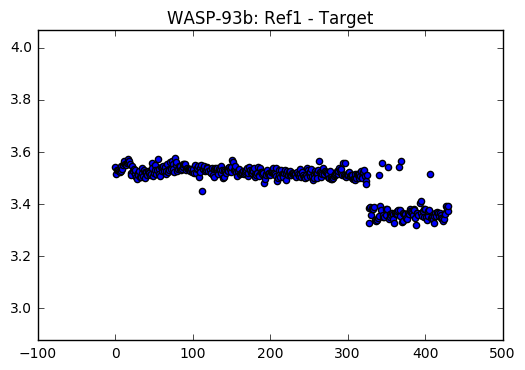

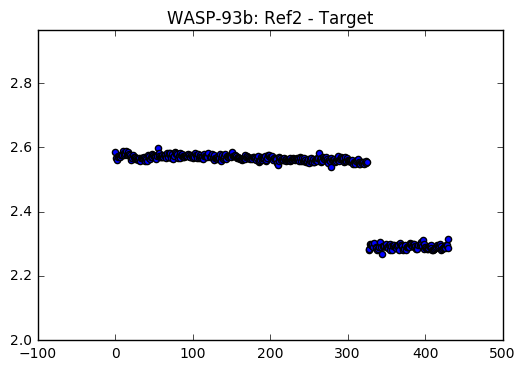

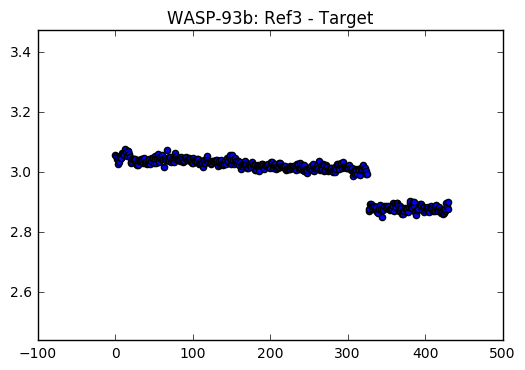

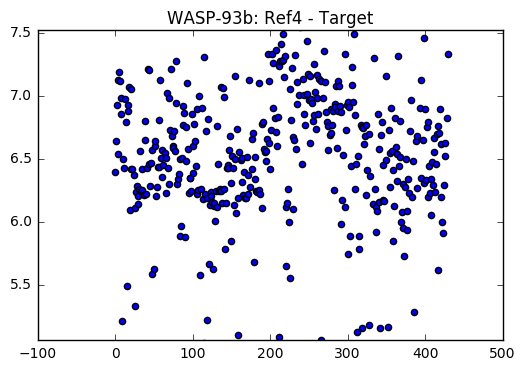

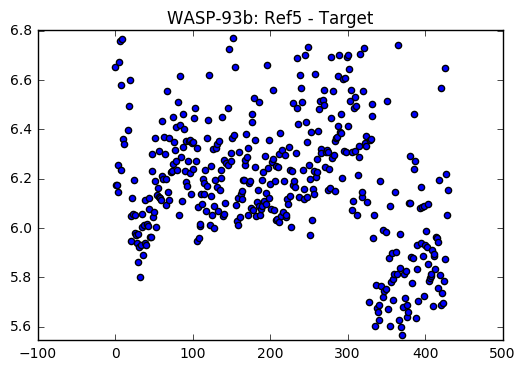

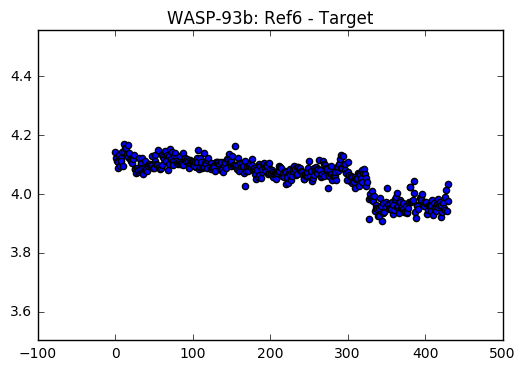

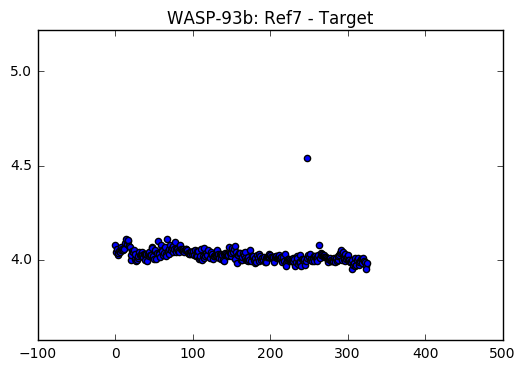

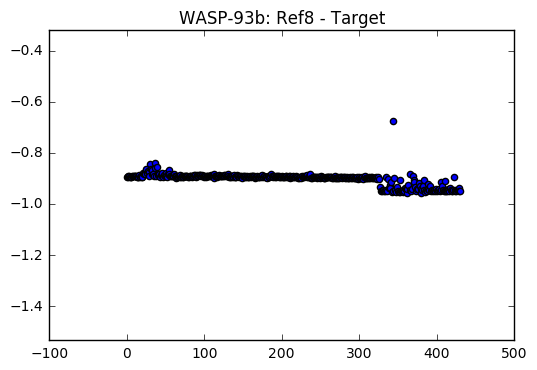

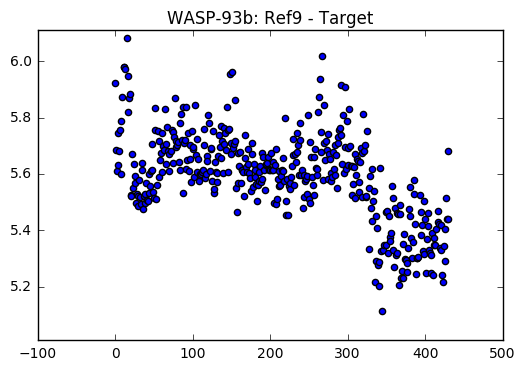

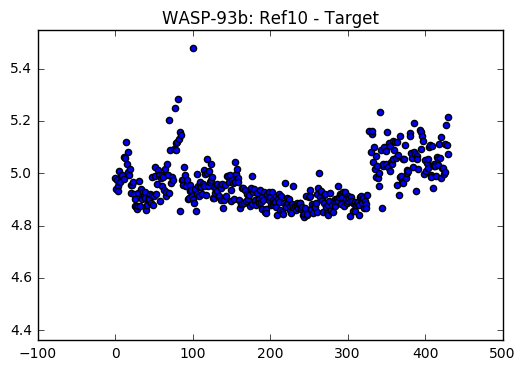

In [57]:
for j in range(0, 10): 
    plt.scatter(range(0, num_file - 1), (ref_mag[j,:-1]-target_mag[:-1]))
    diff_mean = np.mean(ref_mag[j,:-1]-target_mag[:-1])
    diff_std = np.std(ref_mag[j,:-1]-target_mag[:-1])
    #plt.scatter(range(0, num_file - 1), (target_mag[:-1] - ref_mag[j, :-1])/ref_mag[j,:-1])
    plt.ylim(diff_mean - diff_std, diff_mean + diff_std)
    plt.title(planet_name+': Ref'+str(j+1)+' - Target')
    #plt.title('(Target - Ref'+str(j+1)+')/Ref'+str(j+1))
    plt.show()